In [1]:
import torch
import numpy as np

import ast
%load_ext autoreload
%autoreload 2

In [2]:
# import sys
# sys.version

In [3]:
import model
import train

In [9]:
import ast
import os

from collections import Counter, defaultdict

In [5]:
def fails(func):
    try:
        func()
        return False
    except:
        return True

In [6]:
def read_all(path = "../CodeStylometry/Corpus/temp/codejamfolder/py"):
    result = {}
    for handle in os.listdir(path):
        handle_path = os.path.join(path, handle)
        result_for_handle = defaultdict(str)
#         for contest in os.listdir(handle_path):
#             contest_path = os.path.join(handle_path, contest)
        for solution in os.listdir(handle_path):
                solution_path = os.path.join(handle_path, solution)
                with open(solution_path, "r") as f:
                    try:
                        result_for_handle[solution] = f.read()
                    except Exception as e:
                        print(solution_path)
                        print(e)
                    
        result[handle] = result_for_handle
        
    return result

In [7]:


def filter_by_count(data, min_count, max_count):
    result = {}
    for handle, result_for_handle in data.items():
        current = {}
        for problem, solution in result_for_handle.items():
            if not fails(lambda: ast.parse(solution)):
                current[problem.split(".")[0]] = solution


        if len(current) >= min_count and len(current) <= max_count:
            result[handle] = current
    
    return result


In [92]:
data = read_all()

../CodeStylometry/Corpus/temp/codejamfolder/py/smartek0/p2463486.smartek0.py
'utf-8' codec can't decode byte 0xfc in position 111: invalid start byte
../CodeStylometry/Corpus/temp/codejamfolder/py/RedApe0/p1481486.RedApe0.py
'utf-8' codec can't decode byte 0xee in position 1204: invalid continuation byte
../CodeStylometry/Corpus/temp/codejamfolder/py/RedApe0/p1485488.RedApe0.py
'utf-8' codec can't decode byte 0xea in position 1289: invalid continuation byte
../CodeStylometry/Corpus/temp/codejamfolder/py/RedApe0/p1080487.RedApe0.py
'utf-8' codec can't decode byte 0xf2 in position 1158: invalid continuation byte
../CodeStylometry/Corpus/temp/codejamfolder/py/RedApe0/p1590487.RedApe0.py
'utf-8' codec can't decode byte 0xef in position 3183: invalid continuation byte
../CodeStylometry/Corpus/temp/codejamfolder/py/RedApe0/p1480487.RedApe0.py
'utf-8' codec can't decode byte 0xe3 in position 1306: invalid continuation byte
../CodeStylometry/Corpus/temp/codejamfolder/py/apinzonf0/p24481.apinzo

In [93]:
data = filter_by_count(data, 15, 70)

In [12]:
def filter_people(df, people):
    result = {}
    for handle, result_for_handle in df.items():
        if handle in people:
            result[handle] = result_for_handle
    
    return result

In [13]:
def filter_ast_size(df, mn=0, mx=500):
    result = {}
    for handle, result_for_handle in df.items():
        current_result = {}
        for problem, submission in result_for_handle.items():
            try:
                parsed = ast.parse(submission)
                length = len(list(ast.walk(parsed)))
                print(length)
                if length >= mn and length <= mx:
                    current_result[problem] = submission
            except:
                pass
            
        result[handle] = current_result
    
    return result

In [14]:
data = filter_ast_size(data, mn=0, mx=4000)

405
464
578
544
305
244
317
349
455
294
295
396
218
326
266
399
281
500
324
992
350
326
454
373
485
547
562
314
597
432
259
354
277
334
329
317
276
277
319
332
555
276
467
556
493
314
415
1122
416
369
573
446
111
511
150
765
410
427
212
966
368
494
584
279
566
319
519
568
558
231
925
773
310
217
179
573
226
298
432
566
446
455
733
360
747
330
696
479
260
392
273
516
393
370
630
171
457
311
234
361
633
385
297
150
222
207
534
312
403
294
320
488
168
504
946
468
397
202
378
369
374
611
607
338
689
1161
1356
326
423
491
175
577
559
424
385
763
806
255
300
409
310
1823
589
375
292
332
332
620
475
486
322
137
226
417
343
289
316
187
386
221
174
353
239
301
120
483
406
365
171
278
404
277
170
259
274
404
204
272
328
285
344
213
500
87
127
537
269
321
184
115
485
534
347
395
411
162
533
156
305
313
253
202
205
1010
653
660
1462
432
1023
380
414
439
949
1094
386
907
152
423
632
162
759
1025
470
987
305
931
608
766
729
498
1028
301
274
585
386
549
348
324
430
941
127
368
765
543
412
389
573
639

In [52]:
for handle, result_for_handle in data.items():
    z = list(result_for_handle.keys())
    assert len(z) == len(set(z))
#     print()

In [53]:
# for code in data['Dragunov_Nikita'].values():
#     print(code)
#     print("\n\n=========================================\n\n")

In [54]:
print(sorted(data.keys()))

['ali.assaf0', 'bigOnion0', 'd.operator0', 'damo.yu0', 'dennis.lissov0', 'mth0', 'pawko0']


In [55]:
batch_sampler = train.StratifiedBatcherPreprocessed(data, 64, 0.75)
# batch_sampler = train.NameBatcher(data, 64, train_problems, test_problems)

In [56]:
batch_sampler.classes

['ali.assaf0',
 'bigOnion0',
 'd.operator0',
 'damo.yu0',
 'dennis.lissov0',
 'mth0',
 'pawko0']

In [57]:
batch_sampler.get_n_classes()

7

In [58]:
np.unique(batch_sampler.y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]), array([35, 31, 26, 28, 32, 29, 30]))

In [59]:
np.unique(batch_sampler.y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]), array([12, 11,  9, 10, 11, 10, 10]))

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
def build_confusion_matrix(predicted_probs, true):
    n_labels = predicted_probs.shape[1]
#     assert true_y.shape == predicted_probs.shape
    result = np.zeros(shape=(n_labels, n_labels))
    
    pred = predicted_probs.argmax(axis=1)
#     true = true_y.argmax(axis=1)
    
    for pred_cls in range(n_labels):
        for true_cls in range(n_labels):
            result[true_cls, pred_cls] = np.count_nonzero(true[pred == pred_cls] == true_cls)
    norm = result.sum(axis=1)
    norm = np.maximum(norm, 1)
#     result /= norm[:, None]
    return result

def plot_confusion_matrix(confusion_matrix):
    fig = plt.figure( figsize=(20, 20))
    plt.xlabel("True classes")
    plt.ylabel("Predicted classes")
#     sns.heatmap(confusion_matrix, annot=True, vmin=0.0, vmax=1.0, cmap="YlGnBu")
    sns.heatmap(confusion_matrix, annot=True, vmin=0.0, cmap="YlGnBu")

In [61]:
def get_depth(root):
    def dfs(node, depth=0):
        res = depth
        for child in ast.iter_child_nodes(node):
            res = max(res, dfs(child, depth + 1))
        return res
    
    return dfs(root)

In [62]:
def get_breadth(root):
    def dfs(node):
        res = len(list(ast.iter_child_nodes(node)))
        for child in ast.iter_child_nodes(node):
            res = max(dfs(child), res)
        return res
    
    return dfs(root)

def get_breadth(root):
    def dfs(node, depth=0):
        res = len(list(ast.iter_child_nodes(node)))
        if depth == 0:
            return res
        for child in ast.iter_child_nodes(node):
            z = dfs(child, depth + 1)
            if z != -100:
                return res
            
        return -100
    
    return dfs(root)

In [63]:
def describe(x):
    def desc_f(x, f): 
        z = list(map(f, x))
        print((np.mean(z), np.min(z), np.max(z), np.median(z)))
        plt.hist(z)
        plt.show()
        
    desc_f(x, get_depth)
    desc_f(x, get_breadth)
    

In [64]:
import matplotlib.pyplot as plt

In [65]:

# for handle, result_for_handle in data.items():
#     current = {}
#     for problem, solution in result_for_handle.items():
# #         if problem in common_problems:
#             if not fails(lambda: ast.parse(solution)):
#                 current[problem] = solution
#             else:
#                 print("Failed")
    
#     data[handle] = current
# batch_sampler = train.StratifiedBatcherPreprocessed(data, 64, 0.75)

(11.33175355450237, 7, 17, 11.0)


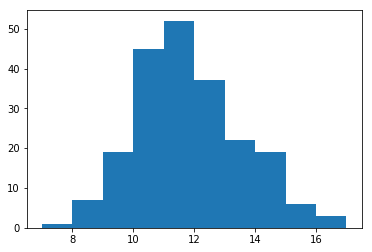

(7.341232227488152, 1, 19, 7.0)


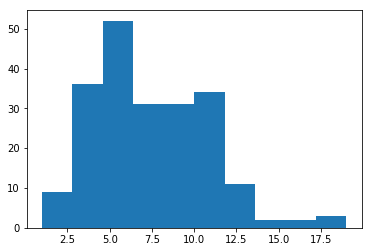

In [66]:
x, y = batch_sampler.x_train, batch_sampler.y_train
describe(x)

(11.383561643835616, 8, 17, 11.0)


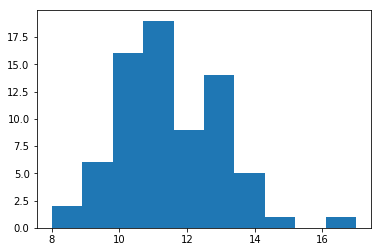

(7.5479452054794525, 2, 16, 8.0)


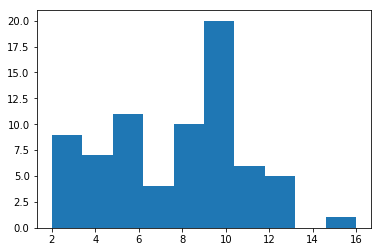

In [49]:
x, y = batch_sampler.x_test, batch_sampler.y_test
describe(x)

In [32]:
import gc
gc.collect()

10663

In [33]:
data = train.read_all()
data = {handle:result_for_handle for handle, result_for_handle in data.items() if len(result_for_handle) >= 55 and len(result_for_handle) <= 70}

In [34]:
for handle, result_for_handle in data.items():
    current = {}
    for problem, solution in result_for_handle.items():
#         if problem in common_problems:
            if not fails(lambda: ast.parse(solution)):
                current[problem] = solution
            else:
                print("Failed")
    
    data[handle] = current

In [35]:
batch_sampler = train.StratifiedBatcherPreprocessed(data, 64, 0.75)

(8.9581589958159, 0, 18, 9.0)


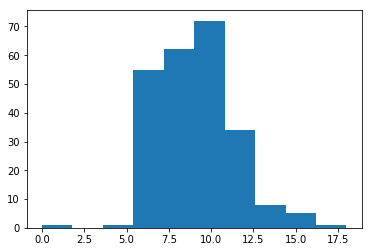

(6.891213389121339, 0, 32, 6.0)


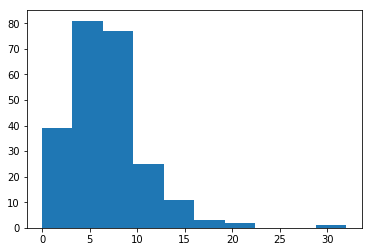

In [42]:
x, y = batch_sampler.x_train, batch_sampler.y_train
describe(x)

(9.072289156626505, 5, 18, 9.0)


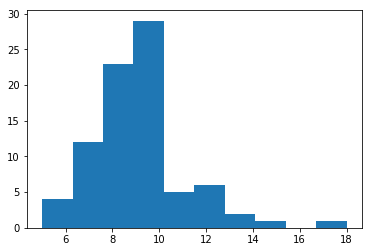

(6.710843373493976, 1, 39, 6.0)


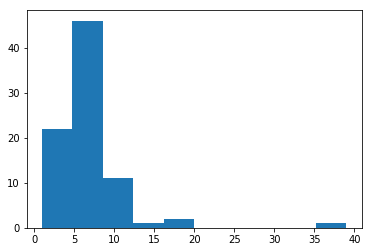

In [43]:
x, y = batch_sampler.x_test, batch_sampler.y_test
describe(x)

In [76]:
def dump_tree_structure(node):
    def dfs(node, acc):
        acc.append(type(node))
        for child in ast.iter_child_nodes(node):
            dfs(child, acc)
        return acc
        
    return dfs(node, [])

In [79]:
code = """
x = 10
b = 12
"""

dump_tree_structure(ast.parse(code)) = dump_tree_structure(ast.parse(code))

True

In [84]:
def compare_for_handle(solutions_1, solutions_2):
    for problem_1, solution_1 in solutions_1.items():
        for problem_2, solution_2 in solutions_2.items():
            if solution_1 == solution_2:
                print("Literal")
                yield (1, 0)
            elif dump_tree_structure(ast.parse(solution_1)) == dump_tree_structure(ast.parse(solution_2)):
                print("Structures")
                yield (0, 1)
            else:     
                yield (0, 0)
            

In [94]:
for handle_1 in data:
    for handle_2 in data:
        if handle_1 != handle_2:
            acc = [0, 0]
            for x in compare_for_handle(data[handle_1], data[handle_2]):
                acc[0] += x[0]
                acc[1] += x[1]
        
            print(handle_1, handle_2, acc)

zerodot0 diver0 [0, 0]
zerodot0 KennethUlrich0 [0, 0]
zerodot0 falcon1123580 [0, 0]
zerodot0 nrpeterson0 [0, 0]
zerodot0 RalfKistner0 [0, 0]
zerodot0 mgiuca0 [0, 0]
zerodot0 Peter.Smit0 [0, 0]
zerodot0 Sp30000 [0, 0]
zerodot0 argusdusty0 [0, 0]
zerodot0 damo.yu0 [0, 0]
zerodot0 ChrisJ0 [0, 0]
zerodot0 elffikk0 [0, 0]
zerodot0 wheleph0 [0, 0]
zerodot0 Shurick0 [0, 0]
zerodot0 cocoatomo0 [0, 0]
zerodot0 SAPikachu0 [0, 0]
zerodot0 Ardem0 [0, 0]
zerodot0 Wesley0 [0, 0]
zerodot0 Nin00 [0, 0]
zerodot0 peterr0 [0, 0]
zerodot0 alexamici0 [0, 0]
zerodot0 shastri0 [0, 0]
zerodot0 xithan0 [0, 0]
zerodot0 netsuso0 [0, 0]
zerodot0 Kabie0 [0, 0]
zerodot0 mth0 [0, 0]
zerodot0 FatAlex0 [0, 0]
zerodot0 dkirienko0 [0, 0]
zerodot0 pumaking940 [0, 0]
zerodot0 pablo.t890 [0, 0]
zerodot0 d.operator0 [0, 0]
zerodot0 killerrex0 [0, 0]
zerodot0 lkj0 [0, 0]
zerodot0 dozingcat0 [0, 0]
zerodot0 Aussiroth0 [0, 0]
zerodot0 pawko0 [0, 0]
zerodot0 peter.gtz0 [0, 0]
zerodot0 j4b0 [0, 0]
zerodot0 GauravRai0 [0, 0]
zero

KennethUlrich0 ChevalierMalFet0 [0, 0]
KennethUlrich0 waynerad0 [0, 0]
KennethUlrich0 brad0 [0, 0]
KennethUlrich0 Sibi0 [0, 0]
KennethUlrich0 Koumes210 [0, 0]
KennethUlrich0 lidaobing0 [0, 0]
KennethUlrich0 progiv0 [0, 0]
KennethUlrich0 waitingkuo05270 [0, 0]
KennethUlrich0 ME.py0 [0, 0]
KennethUlrich0 hirano.y.aa0 [0, 0]
KennethUlrich0 kumarsaurabh0 [0, 0]
falcon1123580 zerodot0 [0, 0]
falcon1123580 diver0 [0, 0]
falcon1123580 KennethUlrich0 [0, 0]
falcon1123580 nrpeterson0 [0, 0]
falcon1123580 RalfKistner0 [0, 0]
falcon1123580 mgiuca0 [0, 0]
falcon1123580 Peter.Smit0 [0, 0]
falcon1123580 Sp30000 [0, 0]
falcon1123580 argusdusty0 [0, 0]
falcon1123580 damo.yu0 [0, 0]
falcon1123580 ChrisJ0 [0, 0]
falcon1123580 elffikk0 [0, 0]
falcon1123580 wheleph0 [0, 0]
falcon1123580 Shurick0 [0, 0]
falcon1123580 cocoatomo0 [0, 0]
falcon1123580 SAPikachu0 [0, 0]
falcon1123580 Ardem0 [0, 0]
falcon1123580 Wesley0 [0, 0]
falcon1123580 Nin00 [0, 0]
falcon1123580 peterr0 [0, 0]
falcon1123580 alexamici0 [0, 

RalfKistner0 ssssss0 [0, 0]
RalfKistner0 mitsukoh0 [0, 0]
RalfKistner0 Wanseira0 [0, 0]
RalfKistner0 ronnodas0 [0, 0]
RalfKistner0 SierraBravo0 [0, 0]
RalfKistner0 Sean2230 [0, 0]
RalfKistner0 nobodyisme0 [0, 0]
RalfKistner0 hector.zhao0 [0, 0]
RalfKistner0 Simozene0 [0, 0]
RalfKistner0 Taizo0 [0, 0]
RalfKistner0 shaunren0 [0, 0]
RalfKistner0 dennis.lissov0 [0, 0]
RalfKistner0 voidus0 [0, 0]
RalfKistner0 EricStansifer0 [0, 0]
RalfKistner0 Jethol0 [0, 0]
RalfKistner0 BlueFish0 [0, 0]
RalfKistner0 P.S.0 [0, 0]
RalfKistner0 Hiking0 [0, 0]
RalfKistner0 takluyver0 [0, 0]
RalfKistner0 IBar0 [0, 0]
RalfKistner0 Hato0 [0, 0]
RalfKistner0 chuck0 [0, 0]
RalfKistner0 dareonion0 [0, 0]
RalfKistner0 schapel0 [0, 0]
RalfKistner0 gsz0 [0, 0]
RalfKistner0 Bugloon0 [0, 0]
RalfKistner0 bbest0 [0, 0]
RalfKistner0 JustinKang0 [0, 0]
RalfKistner0 Fizu0 [0, 0]
RalfKistner0 YOBA0 [0, 0]
RalfKistner0 ana.valeije0 [0, 0]
RalfKistner0 201000 [0, 0]
RalfKistner0 oonishi0 [0, 0]
RalfKistner0 VuryLeo0 [0, 0]
RalfK

Sp30000 schuyler0 [0, 0]
Sp30000 QuentinB0 [0, 0]
Sp30000 HexTree0 [0, 0]
Sp30000 Servy0 [0, 0]
Sp30000 rlyeh0 [0, 0]
Sp30000 coraline0 [0, 0]
Sp30000 LouisP0 [0, 0]
Sp30000 fishball0 [0, 0]
Sp30000 royf0 [0, 0]
Sp30000 bigOnion0 [0, 0]
Sp30000 whaatt0 [0, 0]
Sp30000 mariusd0 [0, 0]
Sp30000 Phayr0 [0, 0]
Sp30000 icedtrees0 [0, 0]
Sp30000 ssssss0 [0, 0]
Sp30000 mitsukoh0 [0, 0]
Sp30000 Wanseira0 [0, 0]
Sp30000 ronnodas0 [0, 0]
Sp30000 SierraBravo0 [0, 0]
Sp30000 Sean2230 [0, 0]
Sp30000 nobodyisme0 [0, 0]
Sp30000 hector.zhao0 [0, 0]
Sp30000 Simozene0 [0, 0]
Sp30000 Taizo0 [0, 0]
Sp30000 shaunren0 [0, 0]
Sp30000 dennis.lissov0 [0, 0]
Sp30000 voidus0 [0, 0]
Sp30000 EricStansifer0 [0, 0]
Sp30000 Jethol0 [0, 0]
Sp30000 BlueFish0 [0, 0]
Sp30000 P.S.0 [0, 0]
Sp30000 Hiking0 [0, 0]
Sp30000 takluyver0 [0, 0]
Sp30000 IBar0 [0, 0]
Sp30000 Hato0 [0, 0]
Sp30000 chuck0 [0, 0]
Sp30000 dareonion0 [0, 0]
Sp30000 schapel0 [0, 0]
Sp30000 gsz0 [0, 0]
Sp30000 Bugloon0 [0, 0]
Sp30000 bbest0 [0, 0]
Sp30000 Ju

ChrisJ0 lkj0 [0, 0]
ChrisJ0 dozingcat0 [0, 0]
ChrisJ0 Aussiroth0 [0, 0]
ChrisJ0 pawko0 [0, 0]
ChrisJ0 peter.gtz0 [0, 0]
ChrisJ0 j4b0 [0, 0]
ChrisJ0 GauravRai0 [0, 0]
ChrisJ0 schuyler0 [0, 0]
ChrisJ0 QuentinB0 [0, 0]
ChrisJ0 HexTree0 [0, 0]
ChrisJ0 Servy0 [0, 0]
ChrisJ0 rlyeh0 [0, 0]
ChrisJ0 coraline0 [0, 0]
ChrisJ0 LouisP0 [0, 0]
ChrisJ0 fishball0 [0, 0]
ChrisJ0 royf0 [0, 0]
ChrisJ0 bigOnion0 [0, 0]
ChrisJ0 whaatt0 [0, 0]
ChrisJ0 mariusd0 [0, 0]
ChrisJ0 Phayr0 [0, 0]
ChrisJ0 icedtrees0 [0, 0]
ChrisJ0 ssssss0 [0, 0]
ChrisJ0 mitsukoh0 [0, 0]
ChrisJ0 Wanseira0 [0, 0]
ChrisJ0 ronnodas0 [0, 0]
ChrisJ0 SierraBravo0 [0, 0]
ChrisJ0 Sean2230 [0, 0]
ChrisJ0 nobodyisme0 [0, 0]
ChrisJ0 hector.zhao0 [0, 0]
ChrisJ0 Simozene0 [0, 0]
ChrisJ0 Taizo0 [0, 0]
ChrisJ0 shaunren0 [0, 0]
ChrisJ0 dennis.lissov0 [0, 0]
ChrisJ0 voidus0 [0, 0]
ChrisJ0 EricStansifer0 [0, 0]
ChrisJ0 Jethol0 [0, 0]
ChrisJ0 BlueFish0 [0, 0]
ChrisJ0 P.S.0 [0, 0]
ChrisJ0 Hiking0 [0, 0]
ChrisJ0 takluyver0 [0, 0]
ChrisJ0 IBar0 [0, 0]
Chr

Shurick0 j4b0 [0, 0]
Shurick0 GauravRai0 [0, 0]
Shurick0 schuyler0 [0, 0]
Shurick0 QuentinB0 [0, 0]
Shurick0 HexTree0 [0, 0]
Shurick0 Servy0 [0, 0]
Shurick0 rlyeh0 [0, 0]
Shurick0 coraline0 [0, 0]
Shurick0 LouisP0 [0, 0]
Shurick0 fishball0 [0, 0]
Shurick0 royf0 [0, 0]
Shurick0 bigOnion0 [0, 0]
Shurick0 whaatt0 [0, 0]
Shurick0 mariusd0 [0, 0]
Shurick0 Phayr0 [0, 0]
Shurick0 icedtrees0 [0, 0]
Shurick0 ssssss0 [0, 0]
Shurick0 mitsukoh0 [0, 0]
Shurick0 Wanseira0 [0, 0]
Shurick0 ronnodas0 [0, 0]
Shurick0 SierraBravo0 [0, 0]
Shurick0 Sean2230 [0, 0]
Shurick0 nobodyisme0 [0, 0]
Shurick0 hector.zhao0 [0, 0]
Shurick0 Simozene0 [0, 0]
Shurick0 Taizo0 [0, 0]
Shurick0 shaunren0 [0, 0]
Shurick0 dennis.lissov0 [0, 0]
Shurick0 voidus0 [0, 0]
Shurick0 EricStansifer0 [0, 0]
Shurick0 Jethol0 [0, 0]
Shurick0 BlueFish0 [0, 0]
Shurick0 P.S.0 [0, 0]
Shurick0 Hiking0 [0, 0]
Shurick0 takluyver0 [0, 0]
Shurick0 IBar0 [0, 0]
Shurick0 Hato0 [0, 0]
Shurick0 chuck0 [0, 0]
Shurick0 dareonion0 [0, 0]
Shurick0 schape

Ardem0 Kabie0 [0, 0]
Ardem0 mth0 [0, 0]
Ardem0 FatAlex0 [0, 0]
Ardem0 dkirienko0 [0, 0]
Ardem0 pumaking940 [0, 0]
Ardem0 pablo.t890 [0, 0]
Ardem0 d.operator0 [0, 0]
Ardem0 killerrex0 [0, 0]
Ardem0 lkj0 [0, 0]
Ardem0 dozingcat0 [0, 0]
Ardem0 Aussiroth0 [0, 0]
Ardem0 pawko0 [0, 0]
Ardem0 peter.gtz0 [0, 0]
Ardem0 j4b0 [0, 0]
Ardem0 GauravRai0 [0, 0]
Ardem0 schuyler0 [0, 0]
Ardem0 QuentinB0 [0, 0]
Ardem0 HexTree0 [0, 0]
Ardem0 Servy0 [0, 0]
Ardem0 rlyeh0 [0, 0]
Ardem0 coraline0 [0, 0]
Ardem0 LouisP0 [0, 0]
Ardem0 fishball0 [0, 0]
Ardem0 royf0 [0, 0]
Ardem0 bigOnion0 [0, 0]
Ardem0 whaatt0 [0, 0]
Ardem0 mariusd0 [0, 0]
Ardem0 Phayr0 [0, 0]
Ardem0 icedtrees0 [0, 0]
Ardem0 ssssss0 [0, 0]
Ardem0 mitsukoh0 [0, 0]
Ardem0 Wanseira0 [0, 0]
Ardem0 ronnodas0 [0, 0]
Ardem0 SierraBravo0 [0, 0]
Ardem0 Sean2230 [0, 0]
Ardem0 nobodyisme0 [0, 0]
Ardem0 hector.zhao0 [0, 0]
Ardem0 Simozene0 [0, 0]
Ardem0 Taizo0 [0, 0]
Ardem0 shaunren0 [0, 0]
Ardem0 dennis.lissov0 [0, 0]
Ardem0 voidus0 [0, 0]
Ardem0 EricStans

peterr0 icedtrees0 [0, 0]
peterr0 ssssss0 [0, 0]
peterr0 mitsukoh0 [0, 0]
peterr0 Wanseira0 [0, 0]
peterr0 ronnodas0 [0, 0]
peterr0 SierraBravo0 [0, 0]
peterr0 Sean2230 [0, 0]
peterr0 nobodyisme0 [0, 0]
peterr0 hector.zhao0 [0, 0]
peterr0 Simozene0 [0, 0]
peterr0 Taizo0 [0, 0]
peterr0 shaunren0 [0, 0]
peterr0 dennis.lissov0 [0, 0]
peterr0 voidus0 [0, 0]
peterr0 EricStansifer0 [0, 0]
peterr0 Jethol0 [0, 0]
peterr0 BlueFish0 [0, 0]
peterr0 P.S.0 [0, 0]
peterr0 Hiking0 [0, 0]
peterr0 takluyver0 [0, 0]
peterr0 IBar0 [0, 0]
peterr0 Hato0 [0, 0]
peterr0 chuck0 [0, 0]
peterr0 dareonion0 [0, 0]
peterr0 schapel0 [0, 0]
peterr0 gsz0 [0, 0]
peterr0 Bugloon0 [0, 0]
peterr0 bbest0 [0, 0]
peterr0 JustinKang0 [0, 0]
peterr0 Fizu0 [0, 0]
peterr0 YOBA0 [0, 0]
peterr0 ana.valeije0 [0, 0]
peterr0 201000 [0, 0]
peterr0 oonishi0 [0, 0]
peterr0 VuryLeo0 [0, 0]
peterr0 Tonto0 [0, 0]
peterr0 nitsas0 [0, 0]
peterr0 RudyGuillan0 [0, 0]
peterr0 Soloman0 [0, 0]
peterr0 farin0 [0, 0]
peterr0 axr1230 [0, 0]
peterr0

xithan0 mariusd0 [0, 0]
xithan0 Phayr0 [0, 0]
xithan0 icedtrees0 [0, 0]
xithan0 ssssss0 [0, 0]
xithan0 mitsukoh0 [0, 0]
xithan0 Wanseira0 [0, 0]
xithan0 ronnodas0 [0, 0]
xithan0 SierraBravo0 [0, 0]
xithan0 Sean2230 [0, 0]
xithan0 nobodyisme0 [0, 0]
xithan0 hector.zhao0 [0, 0]
xithan0 Simozene0 [0, 0]
xithan0 Taizo0 [0, 0]
xithan0 shaunren0 [0, 0]
xithan0 dennis.lissov0 [0, 0]
xithan0 voidus0 [0, 0]
xithan0 EricStansifer0 [0, 0]
xithan0 Jethol0 [0, 0]
xithan0 BlueFish0 [0, 0]
xithan0 P.S.0 [0, 0]
xithan0 Hiking0 [0, 0]
xithan0 takluyver0 [0, 0]
xithan0 IBar0 [0, 0]
xithan0 Hato0 [0, 0]
xithan0 chuck0 [0, 0]
xithan0 dareonion0 [0, 0]
xithan0 schapel0 [0, 0]
xithan0 gsz0 [0, 0]
xithan0 Bugloon0 [0, 0]
xithan0 bbest0 [0, 0]
xithan0 JustinKang0 [0, 0]
xithan0 Fizu0 [0, 0]
xithan0 YOBA0 [0, 0]
xithan0 ana.valeije0 [0, 0]
xithan0 201000 [0, 0]
xithan0 oonishi0 [0, 0]
xithan0 VuryLeo0 [0, 0]
xithan0 Tonto0 [0, 0]
xithan0 nitsas0 [0, 0]
xithan0 RudyGuillan0 [0, 0]
xithan0 Soloman0 [0, 0]
xithan

mth0 chuck0 [0, 0]
mth0 dareonion0 [0, 0]
mth0 schapel0 [0, 0]
mth0 gsz0 [0, 0]
mth0 Bugloon0 [0, 0]
mth0 bbest0 [0, 0]
mth0 JustinKang0 [0, 0]
mth0 Fizu0 [0, 0]
mth0 YOBA0 [0, 0]
mth0 ana.valeije0 [0, 0]
mth0 201000 [0, 0]
mth0 oonishi0 [0, 0]
mth0 VuryLeo0 [0, 0]
mth0 Tonto0 [0, 0]
mth0 nitsas0 [0, 0]
mth0 RudyGuillan0 [0, 0]
mth0 Soloman0 [0, 0]
mth0 farin0 [0, 0]
mth0 axr1230 [0, 0]
mth0 ali.assaf0 [0, 0]
mth0 jgaten0 [0, 0]
mth0 barryd0 [0, 0]
mth0 ChevalierMalFet0 [0, 0]
mth0 waynerad0 [0, 0]
mth0 brad0 [0, 0]
mth0 Sibi0 [0, 0]
mth0 Koumes210 [0, 0]
mth0 lidaobing0 [0, 0]
mth0 progiv0 [0, 0]
mth0 waitingkuo05270 [0, 0]
mth0 ME.py0 [0, 0]
mth0 hirano.y.aa0 [0, 0]
mth0 kumarsaurabh0 [0, 0]
FatAlex0 zerodot0 [0, 0]
FatAlex0 diver0 [0, 0]
FatAlex0 KennethUlrich0 [0, 0]
FatAlex0 falcon1123580 [0, 0]
FatAlex0 nrpeterson0 [0, 0]
FatAlex0 RalfKistner0 [0, 0]
FatAlex0 mgiuca0 [0, 0]
FatAlex0 Peter.Smit0 [0, 0]
FatAlex0 Sp30000 [0, 0]
FatAlex0 argusdusty0 [0, 0]
FatAlex0 damo.yu0 [0, 0]
Fa

pumaking940 voidus0 [0, 0]
pumaking940 EricStansifer0 [0, 0]
pumaking940 Jethol0 [0, 0]
pumaking940 BlueFish0 [0, 0]
pumaking940 P.S.0 [0, 0]
pumaking940 Hiking0 [0, 0]
pumaking940 takluyver0 [0, 0]
pumaking940 IBar0 [0, 0]
pumaking940 Hato0 [0, 0]
pumaking940 chuck0 [0, 0]
pumaking940 dareonion0 [0, 0]
pumaking940 schapel0 [0, 0]
pumaking940 gsz0 [0, 0]
pumaking940 Bugloon0 [0, 0]
pumaking940 bbest0 [0, 0]
pumaking940 JustinKang0 [0, 0]
pumaking940 Fizu0 [0, 0]
pumaking940 YOBA0 [0, 0]
pumaking940 ana.valeije0 [0, 0]
pumaking940 201000 [0, 0]
pumaking940 oonishi0 [0, 0]
pumaking940 VuryLeo0 [0, 0]
pumaking940 Tonto0 [0, 0]
pumaking940 nitsas0 [0, 0]
pumaking940 RudyGuillan0 [0, 0]
pumaking940 Soloman0 [0, 0]
pumaking940 farin0 [0, 0]
pumaking940 axr1230 [0, 0]
pumaking940 ali.assaf0 [0, 0]
pumaking940 jgaten0 [0, 0]
pumaking940 barryd0 [0, 0]
pumaking940 ChevalierMalFet0 [0, 0]
pumaking940 waynerad0 [0, 0]
pumaking940 brad0 [0, 0]
pumaking940 Sibi0 [0, 0]
pumaking940 Koumes210 [0, 0]


killerrex0 schuyler0 [0, 0]
killerrex0 QuentinB0 [0, 0]
killerrex0 HexTree0 [0, 0]
killerrex0 Servy0 [0, 0]
killerrex0 rlyeh0 [0, 0]
killerrex0 coraline0 [0, 0]
killerrex0 LouisP0 [0, 0]
killerrex0 fishball0 [0, 0]
killerrex0 royf0 [0, 0]
killerrex0 bigOnion0 [0, 0]
killerrex0 whaatt0 [0, 0]
killerrex0 mariusd0 [0, 0]
killerrex0 Phayr0 [0, 0]
killerrex0 icedtrees0 [0, 0]
killerrex0 ssssss0 [0, 0]
killerrex0 mitsukoh0 [0, 0]
killerrex0 Wanseira0 [0, 0]
killerrex0 ronnodas0 [0, 0]
killerrex0 SierraBravo0 [0, 0]
killerrex0 Sean2230 [0, 0]
killerrex0 nobodyisme0 [0, 0]
killerrex0 hector.zhao0 [0, 0]
killerrex0 Simozene0 [0, 0]
killerrex0 Taizo0 [0, 0]
killerrex0 shaunren0 [0, 0]
killerrex0 dennis.lissov0 [0, 0]
killerrex0 voidus0 [0, 0]
killerrex0 EricStansifer0 [0, 0]
killerrex0 Jethol0 [0, 0]
killerrex0 BlueFish0 [0, 0]
killerrex0 P.S.0 [0, 0]
killerrex0 Hiking0 [0, 0]
killerrex0 takluyver0 [0, 0]
killerrex0 IBar0 [0, 0]
killerrex0 Hato0 [0, 0]
killerrex0 chuck0 [0, 0]
killerrex0 dareoni

Aussiroth0 HexTree0 [0, 0]
Aussiroth0 Servy0 [0, 0]
Aussiroth0 rlyeh0 [0, 0]
Aussiroth0 coraline0 [0, 0]
Aussiroth0 LouisP0 [0, 0]
Aussiroth0 fishball0 [0, 0]
Aussiroth0 royf0 [0, 0]
Aussiroth0 bigOnion0 [0, 0]
Aussiroth0 whaatt0 [0, 0]
Aussiroth0 mariusd0 [0, 0]
Aussiroth0 Phayr0 [0, 0]
Aussiroth0 icedtrees0 [0, 0]
Aussiroth0 ssssss0 [0, 0]
Aussiroth0 mitsukoh0 [0, 0]
Aussiroth0 Wanseira0 [0, 0]
Aussiroth0 ronnodas0 [0, 0]
Aussiroth0 SierraBravo0 [0, 0]
Aussiroth0 Sean2230 [0, 0]
Aussiroth0 nobodyisme0 [0, 0]
Aussiroth0 hector.zhao0 [0, 0]
Aussiroth0 Simozene0 [0, 0]
Aussiroth0 Taizo0 [0, 0]
Aussiroth0 shaunren0 [0, 0]
Aussiroth0 dennis.lissov0 [0, 0]
Aussiroth0 voidus0 [0, 0]
Aussiroth0 EricStansifer0 [0, 0]
Aussiroth0 Jethol0 [0, 0]
Aussiroth0 BlueFish0 [0, 0]
Aussiroth0 P.S.0 [0, 0]
Aussiroth0 Hiking0 [0, 0]
Aussiroth0 takluyver0 [0, 0]
Aussiroth0 IBar0 [0, 0]
Aussiroth0 Hato0 [0, 0]
Aussiroth0 chuck0 [0, 0]
Aussiroth0 dareonion0 [0, 0]
Aussiroth0 schapel0 [0, 0]
Aussiroth0 gsz0 [0

j4b0 LouisP0 [0, 0]
j4b0 fishball0 [0, 0]
j4b0 royf0 [0, 0]
j4b0 bigOnion0 [0, 0]
j4b0 whaatt0 [0, 0]
j4b0 mariusd0 [0, 0]
j4b0 Phayr0 [0, 0]
j4b0 icedtrees0 [0, 0]
j4b0 ssssss0 [0, 0]
j4b0 mitsukoh0 [0, 0]
j4b0 Wanseira0 [0, 0]
j4b0 ronnodas0 [0, 0]
j4b0 SierraBravo0 [0, 0]
j4b0 Sean2230 [0, 0]
j4b0 nobodyisme0 [0, 0]
j4b0 hector.zhao0 [0, 0]
j4b0 Simozene0 [0, 0]
j4b0 Taizo0 [0, 0]
j4b0 shaunren0 [0, 0]
j4b0 dennis.lissov0 [0, 0]
j4b0 voidus0 [0, 0]
j4b0 EricStansifer0 [0, 0]
j4b0 Jethol0 [0, 0]
j4b0 BlueFish0 [0, 0]
j4b0 P.S.0 [0, 0]
j4b0 Hiking0 [0, 0]
j4b0 takluyver0 [0, 0]
j4b0 IBar0 [0, 0]
j4b0 Hato0 [0, 0]
j4b0 chuck0 [0, 0]
j4b0 dareonion0 [0, 0]
j4b0 schapel0 [0, 0]
j4b0 gsz0 [0, 0]
j4b0 Bugloon0 [0, 0]
j4b0 bbest0 [0, 0]
j4b0 JustinKang0 [0, 0]
j4b0 Fizu0 [0, 0]
j4b0 YOBA0 [0, 0]
j4b0 ana.valeije0 [0, 0]
j4b0 201000 [0, 0]
j4b0 oonishi0 [0, 0]
j4b0 VuryLeo0 [0, 0]
j4b0 Tonto0 [0, 0]
j4b0 nitsas0 [0, 0]
j4b0 RudyGuillan0 [0, 0]
j4b0 Soloman0 [0, 0]
j4b0 farin0 [0, 0]
j4b0 axr

QuentinB0 Servy0 [0, 0]
QuentinB0 rlyeh0 [0, 0]
QuentinB0 coraline0 [0, 0]
QuentinB0 LouisP0 [0, 0]
QuentinB0 fishball0 [0, 0]
QuentinB0 royf0 [0, 0]
QuentinB0 bigOnion0 [0, 0]
QuentinB0 whaatt0 [0, 0]
QuentinB0 mariusd0 [0, 0]
QuentinB0 Phayr0 [0, 0]
QuentinB0 icedtrees0 [0, 0]
QuentinB0 ssssss0 [0, 0]
QuentinB0 mitsukoh0 [0, 0]
QuentinB0 Wanseira0 [0, 0]
QuentinB0 ronnodas0 [0, 0]
QuentinB0 SierraBravo0 [0, 0]
QuentinB0 Sean2230 [0, 0]
QuentinB0 nobodyisme0 [0, 0]
QuentinB0 hector.zhao0 [0, 0]
QuentinB0 Simozene0 [0, 0]
QuentinB0 Taizo0 [0, 0]
QuentinB0 shaunren0 [0, 0]
QuentinB0 dennis.lissov0 [0, 0]
QuentinB0 voidus0 [0, 0]
QuentinB0 EricStansifer0 [0, 0]
QuentinB0 Jethol0 [0, 0]
QuentinB0 BlueFish0 [0, 0]
QuentinB0 P.S.0 [0, 0]
QuentinB0 Hiking0 [0, 0]
QuentinB0 takluyver0 [0, 0]
QuentinB0 IBar0 [0, 0]
QuentinB0 Hato0 [0, 0]
QuentinB0 chuck0 [0, 0]
QuentinB0 dareonion0 [0, 0]
QuentinB0 schapel0 [0, 0]
QuentinB0 gsz0 [0, 0]
QuentinB0 Bugloon0 [0, 0]
QuentinB0 bbest0 [0, 0]
QuentinB

rlyeh0 mitsukoh0 [0, 0]
rlyeh0 Wanseira0 [0, 0]
rlyeh0 ronnodas0 [0, 0]
rlyeh0 SierraBravo0 [0, 0]
rlyeh0 Sean2230 [0, 0]
rlyeh0 nobodyisme0 [0, 0]
rlyeh0 hector.zhao0 [0, 0]
rlyeh0 Simozene0 [0, 0]
rlyeh0 Taizo0 [0, 0]
rlyeh0 shaunren0 [0, 0]
rlyeh0 dennis.lissov0 [0, 0]
rlyeh0 voidus0 [0, 0]
rlyeh0 EricStansifer0 [0, 0]
rlyeh0 Jethol0 [0, 0]
rlyeh0 BlueFish0 [0, 0]
rlyeh0 P.S.0 [0, 0]
rlyeh0 Hiking0 [0, 0]
rlyeh0 takluyver0 [0, 0]
rlyeh0 IBar0 [0, 0]
rlyeh0 Hato0 [0, 0]
rlyeh0 chuck0 [0, 0]
rlyeh0 dareonion0 [0, 0]
rlyeh0 schapel0 [0, 0]
rlyeh0 gsz0 [0, 0]
rlyeh0 Bugloon0 [0, 0]
rlyeh0 bbest0 [0, 0]
rlyeh0 JustinKang0 [0, 0]
rlyeh0 Fizu0 [0, 0]
rlyeh0 YOBA0 [0, 0]
rlyeh0 ana.valeije0 [0, 0]
rlyeh0 201000 [0, 0]
rlyeh0 oonishi0 [0, 0]
rlyeh0 VuryLeo0 [0, 0]
rlyeh0 Tonto0 [0, 0]
rlyeh0 nitsas0 [0, 0]
rlyeh0 RudyGuillan0 [0, 0]
rlyeh0 Soloman0 [0, 0]
rlyeh0 farin0 [0, 0]
rlyeh0 axr1230 [0, 0]
rlyeh0 ali.assaf0 [0, 0]
rlyeh0 jgaten0 [0, 0]
rlyeh0 barryd0 [0, 0]
rlyeh0 ChevalierMalFet0 [0

fishball0 Sean2230 [0, 0]
fishball0 nobodyisme0 [0, 0]
fishball0 hector.zhao0 [0, 0]
fishball0 Simozene0 [0, 0]
fishball0 Taizo0 [0, 0]
fishball0 shaunren0 [0, 0]
fishball0 dennis.lissov0 [0, 0]
fishball0 voidus0 [0, 0]
fishball0 EricStansifer0 [0, 0]
fishball0 Jethol0 [0, 0]
fishball0 BlueFish0 [0, 0]
fishball0 P.S.0 [0, 0]
fishball0 Hiking0 [0, 0]
fishball0 takluyver0 [0, 0]
fishball0 IBar0 [0, 0]
fishball0 Hato0 [0, 0]
fishball0 chuck0 [0, 0]
fishball0 dareonion0 [0, 0]
fishball0 schapel0 [0, 0]
fishball0 gsz0 [0, 0]
fishball0 Bugloon0 [0, 0]
fishball0 bbest0 [0, 0]
fishball0 JustinKang0 [0, 0]
fishball0 Fizu0 [0, 0]
fishball0 YOBA0 [0, 0]
fishball0 ana.valeije0 [0, 0]
fishball0 201000 [0, 0]
fishball0 oonishi0 [0, 0]
fishball0 VuryLeo0 [0, 0]
fishball0 Tonto0 [0, 0]
fishball0 nitsas0 [0, 0]
fishball0 RudyGuillan0 [0, 0]
fishball0 Soloman0 [0, 0]
fishball0 farin0 [0, 0]
fishball0 axr1230 [0, 0]
fishball0 ali.assaf0 [0, 0]
fishball0 jgaten0 [0, 0]
fishball0 barryd0 [0, 0]
fishball0 C

whaatt0 P.S.0 [0, 0]
whaatt0 Hiking0 [0, 0]
whaatt0 takluyver0 [0, 0]
whaatt0 IBar0 [0, 0]
whaatt0 Hato0 [0, 0]
whaatt0 chuck0 [0, 0]
whaatt0 dareonion0 [0, 0]
whaatt0 schapel0 [0, 0]
whaatt0 gsz0 [0, 0]
whaatt0 Bugloon0 [0, 0]
whaatt0 bbest0 [0, 0]
whaatt0 JustinKang0 [0, 0]
whaatt0 Fizu0 [0, 0]
whaatt0 YOBA0 [0, 0]
whaatt0 ana.valeije0 [0, 0]
whaatt0 201000 [0, 0]
whaatt0 oonishi0 [0, 0]
whaatt0 VuryLeo0 [0, 0]
whaatt0 Tonto0 [0, 0]
whaatt0 nitsas0 [0, 0]
whaatt0 RudyGuillan0 [0, 0]
whaatt0 Soloman0 [0, 0]
whaatt0 farin0 [0, 0]
whaatt0 axr1230 [0, 0]
whaatt0 ali.assaf0 [0, 0]
whaatt0 jgaten0 [0, 0]
whaatt0 barryd0 [0, 0]
whaatt0 ChevalierMalFet0 [0, 0]
whaatt0 waynerad0 [0, 0]
whaatt0 brad0 [0, 0]
whaatt0 Sibi0 [0, 0]
whaatt0 Koumes210 [0, 0]
whaatt0 lidaobing0 [0, 0]
whaatt0 progiv0 [0, 0]
whaatt0 waitingkuo05270 [0, 0]
whaatt0 ME.py0 [0, 0]
whaatt0 hirano.y.aa0 [0, 0]
whaatt0 kumarsaurabh0 [0, 0]
mariusd0 zerodot0 [0, 0]
mariusd0 diver0 [0, 0]
mariusd0 KennethUlrich0 [0, 0]
mariusd

icedtrees0 schapel0 [0, 0]
icedtrees0 gsz0 [0, 0]
icedtrees0 Bugloon0 [0, 0]
icedtrees0 bbest0 [0, 0]
icedtrees0 JustinKang0 [0, 0]
icedtrees0 Fizu0 [0, 0]
icedtrees0 YOBA0 [0, 0]
icedtrees0 ana.valeije0 [0, 0]
icedtrees0 201000 [0, 0]
icedtrees0 oonishi0 [0, 0]
icedtrees0 VuryLeo0 [0, 0]
icedtrees0 Tonto0 [0, 0]
icedtrees0 nitsas0 [0, 0]
icedtrees0 RudyGuillan0 [0, 0]
icedtrees0 Soloman0 [0, 0]
icedtrees0 farin0 [0, 0]
icedtrees0 axr1230 [0, 0]
icedtrees0 ali.assaf0 [0, 0]
icedtrees0 jgaten0 [0, 0]
icedtrees0 barryd0 [0, 0]
icedtrees0 ChevalierMalFet0 [0, 0]
icedtrees0 waynerad0 [0, 0]
icedtrees0 brad0 [0, 0]
icedtrees0 Sibi0 [0, 0]
icedtrees0 Koumes210 [0, 0]
icedtrees0 lidaobing0 [0, 0]
icedtrees0 progiv0 [0, 0]
icedtrees0 waitingkuo05270 [0, 0]
icedtrees0 ME.py0 [0, 0]
icedtrees0 hirano.y.aa0 [0, 0]
icedtrees0 kumarsaurabh0 [0, 0]
ssssss0 zerodot0 [0, 0]
ssssss0 diver0 [0, 0]
ssssss0 KennethUlrich0 [0, 0]
ssssss0 falcon1123580 [0, 0]
ssssss0 nrpeterson0 [0, 0]
ssssss0 RalfKistner0 

Wanseira0 IBar0 [0, 0]
Wanseira0 Hato0 [0, 0]
Wanseira0 chuck0 [0, 0]
Wanseira0 dareonion0 [0, 0]
Wanseira0 schapel0 [0, 0]
Wanseira0 gsz0 [0, 0]
Wanseira0 Bugloon0 [0, 0]
Wanseira0 bbest0 [0, 0]
Wanseira0 JustinKang0 [0, 0]
Wanseira0 Fizu0 [0, 0]
Wanseira0 YOBA0 [0, 0]
Wanseira0 ana.valeije0 [0, 0]
Wanseira0 201000 [0, 0]
Wanseira0 oonishi0 [0, 0]
Wanseira0 VuryLeo0 [0, 0]
Wanseira0 Tonto0 [0, 0]
Wanseira0 nitsas0 [0, 0]
Wanseira0 RudyGuillan0 [0, 0]
Wanseira0 Soloman0 [0, 0]
Wanseira0 farin0 [0, 0]
Wanseira0 axr1230 [0, 0]
Wanseira0 ali.assaf0 [0, 0]
Wanseira0 jgaten0 [0, 0]
Wanseira0 barryd0 [0, 0]
Wanseira0 ChevalierMalFet0 [0, 0]
Wanseira0 waynerad0 [0, 0]
Wanseira0 brad0 [0, 0]
Wanseira0 Sibi0 [0, 0]
Wanseira0 Koumes210 [0, 0]
Wanseira0 lidaobing0 [0, 0]
Wanseira0 progiv0 [0, 0]
Wanseira0 waitingkuo05270 [0, 0]
Wanseira0 ME.py0 [0, 0]
Wanseira0 hirano.y.aa0 [0, 0]
Wanseira0 kumarsaurabh0 [0, 0]
ronnodas0 zerodot0 [0, 0]
ronnodas0 diver0 [0, 0]
ronnodas0 KennethUlrich0 [0, 0]
ronn

KeyboardInterrupt: 

In [108]:
def compare_problems_for_handle(solutions):
    literal = 0
    structural = 0
    for problem_1, solution_1 in solutions.items():
        for problem_2, solution_2 in solutions.items():
            if problem_1 != problem_2:
                if solution_1 == solution_2:
#                     print("Literal")
                    literal += 1
                elif dump_tree_structure(ast.parse(solution_1)) == dump_tree_structure(ast.parse(solution_2)):
                    print("Structures", problem_1, problem_2)
                    structural += 1
    
    return literal, structural
            

In [109]:
for handle, solutions in data.items():
    a, b = compare_problems_for_handle(solutions)
    if a > 0 or b > 0:
        print(handle, (a, b), len(solutions))
    

Structures p1480487 p1674486
Structures p1674486 p1480487
xithan0 (4, 2) 16
Structures p1481486 p1480487
Structures p1480487 p1481486
mth0 (0, 2) 39
Structures p2652486 p698485
Structures p2652486 p190103
Structures p2652486 p144111
Structures p2652486 p241102
Structures p2652486 p168107
Structures p698485 p2652486
Structures p698485 p2645486
Structures p698485 p2766487
Structures p698485 p2850486
Structures p698485 p2772486
Structures p698485 p2779487
Structures p698485 p2464487
Structures p190103 p2652486
Structures p190103 p2645486
Structures p190103 p2766487
Structures p190103 p2850486
Structures p190103 p2772486
Structures p190103 p2779487
Structures p190103 p2464487
Structures p2645486 p698485
Structures p2645486 p190103
Structures p2645486 p144111
Structures p2645486 p241102
Structures p2645486 p168107
Structures p2766487 p698485
Structures p2766487 p190103
Structures p2766487 p144111
Structures p2766487 p241102
Structures p2766487 p168107
Structures p2850486 p698485
Structures 

In [105]:
len(data['xithan0'])

16

In [99]:
for item in data['nitsas0'].values():
    print(item)
    print("\n``````````````````````````\n")

"""
A collection of small, helpful functions I'll be using a lot.

author: 
Christos Nitsas
(chrisn654)

language:
Python 3.2.1

date:
April, 2012
"""


__name__ = "helpful"
__all__  = ["read_int", "read_float", "read_list_of_str", 
            "read_list_of_int", "read_list_of_float"]


# In every function below, 'file' is an open file object.


def read_int(file):
    return int(file.readline())

def read_float(file):
    return float(file.readline())

def read_list_of_str(file):
    return file.readline().split()

def read_list_of_int(file):
    return [i for i in map(int, read_list_of_str(file))]

def read_list_of_float(file):
    return [f for f in map(float, read_list_of_str(file))]



``````````````````````````

"""
A collection of small, helpful functions I'll be using a lot.

author: 
Christos Nitsas
(chrisn654)

language:
Python 3.2.1

date:
April, 2012
"""


__name__ = "helpful"
__all__  = ["read_int", "read_float", "read_list_of_str", 
            "read_list_of_int", "read_

In [100]:
for item in data['EricStansifer0'].values():
    print(item)
    print("\n``````````````````````````\n")

import sys, os

in_file = None
out_file = None

def run_main(sys_args, main):
    name = sys_args[0][:-3]
    in_file_name = name + ".in"
    out_file_name = name + ".out"
    if len(sys_args) == 2:
        in_file_name = sys_args[1]
        out_file_name = in_file_name[:-3] + ".out"
    if len(sys_args) == 3:
        if sys_args[1]:
            in_file_name = sys_args[1]
        if sys_args[2]:
            out_file_name = sys_args[2]

    global in_file
    global out_file
    
    if in_file_name == '-':
        in_file = sys.stdin
    else:
        in_file = open(in_file_name, 'r')

    if out_file_name == '-':
        out_file = sys.stdout
    else:
        out_file = open(out_file_name, 'w')

    main(in_file, out_file)

    out_file.close()
    in_file.close()

def run_tests(sys_args, do_testcase):
    def main(in_file, out_file):
        t = readinteger()
        for x in xrange(t):
            do_testcase(x + 1)
    run_main(sys_args, main)

def readline():
    return in_file.r

NameError: name 'KennethUlrich0' is not defined

In [102]:
for item in data['KennethUlrich0'].values():
    print(item)
    print("\n``````````````````````````\n")

import fractions
import functools
import itertools
import math
import operator

from sys import stdin
from multiprocessing import Pool

def solve_star(args):
    return solve(*args)

def read_floats():
    return [float(n) for n in stdin.readline().strip().split()]

def read_int():
    return int(stdin.readline().strip())

def read_ints():
    return [int(n) for n in stdin.readline().strip().split()]

def read_words():
    return stdin.readline().strip()

def parse():
    a, b = read_ints()
    f = read_floats()
    return [a, b, f]

def solve(a, b, f):
    v = []
    z = 1.0
    p = f[0]
    chars_left = b + (a - 1)
    cost = p * (chars_left) + (1.0 - p) * (chars_left + b + 1)
    v.append(cost)
    for i in range(1, a):
        chars_left -= 2
        p = p * (f[i])
        cost = p * (chars_left) + (1.0 - p) * (chars_left + b + 1)
        v.append(cost)
    best = float(2 + b)
    for val in v:
        if val < best:
            best = val 
    return best

if __name__ == '__main__